In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
data= pd.read_csv('Adidas.csv')

In [3]:
data.rename( columns={'Unnamed: 0':'a'}, inplace=True )


In [4]:
  data.drop(["Retailer","Retailer ID","Region","State","City","Product","Operating Margin","Sales Method","Invoice Date"], axis=1, inplace=True)

In [5]:
data.head()

,a,Price per Unit,Units Sold,Total Sales,Operating Profit
0,NaN,$50.00,1200,"$600,000","$300,000"
1,NaN,$50.00,1000,"$500,000","$150,000"
2,NaN,$40.00,1000,"$400,000","$140,000"
3,NaN,$45.00,850,"$382,500","$133,875"
4,NaN,$60.00,900,"$540,000","$162,000"


In [6]:
data.isnull().sum()

a                   9648
Price per Unit         0
Units Sold             0
Total Sales            0
Operating Profit       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   a                 0 non-null      float64
 1   Price per Unit    9648 non-null   object 
 2   Units Sold        9648 non-null   int64  
 3   Total Sales       9648 non-null   object 
 4   Operating Profit  9648 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 377.0+ KB


In [8]:
data.describe()

,a,Units Sold
count,0.0,9648.000000
mean,NaN,256.930037
std,NaN,214.252030
min,NaN,0.000000
25%,NaN,106.000000
50%,NaN,176.000000
75%,NaN,350.000000
max,NaN,1275.000000


In [9]:

# string karakter barındıran columnları temizlemek gerekiyor.
 
data["Operating Profit"] = data["Operating Profit"].str.extract(pat='(\d+)', expand=False)
data["Price per Unit"] = data["Price per Unit"].str.extract(pat='(\d+)', expand=False)
data["Total Sales"] = data["Total Sales"].str.extract(pat='(\d+)', expand=False)

In [10]:
# object nesnesini float a dönüştürerek hatanın önüne geçilir.
data['Operating Profit']= data['Operating Profit'].astype(float)
data['Price per UnitTotal']= data['Price per Unit'].astype(float)
data['Price per Unit']= data['Price per Unit'].astype(float)
data['Total Sales']= data['Total Sales'].astype(float)


In [11]:
data["Price per Unit"]

0       50.0
1       50.0
2       40.0
3       45.0
4       60.0
        ... 
9643    50.0
9644    41.0
9645    41.0
9646    42.0
9647    29.0
Name: Price per Unit, Length: 9648, dtype: float64

In [12]:
data["Operating Profit"].mean()

99.85468490878938

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   a                    0 non-null      float64
 1   Price per Unit       9648 non-null   float64
 2   Units Sold           9648 non-null   int64  
 3   Total Sales          9648 non-null   float64
 4   Operating Profit     9648 non-null   float64
 5   Price per UnitTotal  9648 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 452.4 KB


In [14]:
sns.set()

<Figure size 600x600 with 0 Axes>

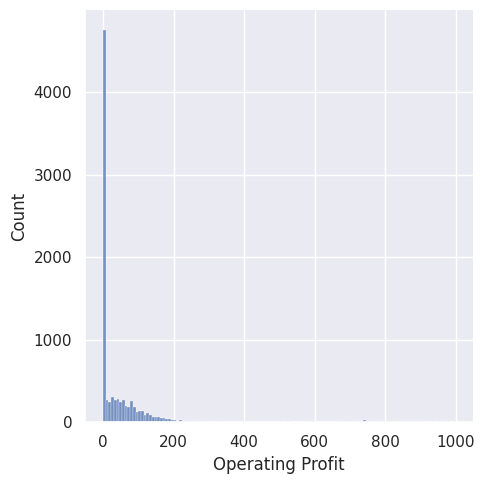

In [15]:
plt.figure(figsize=(6,6))
sns.displot(data['Operating Profit'])
plt.show()

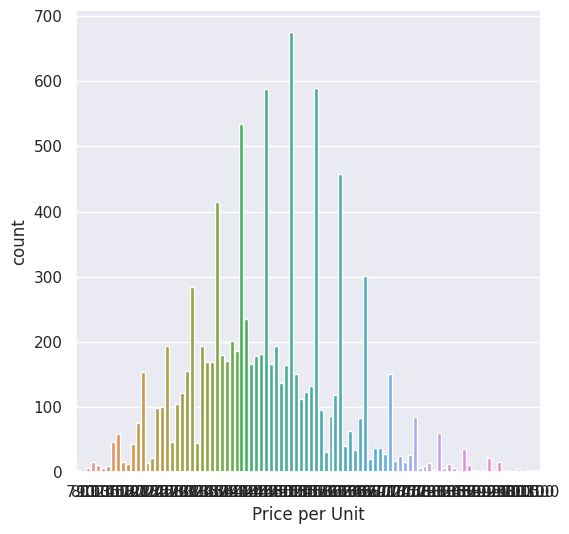

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Price per Unit',data=data)
plt.show()

In [17]:
encoder = LabelEncoder()

In [18]:
data['Operating Profit']=encoder.fit_transform(data['Operating Profit'])
data['Total Sales']=encoder.fit_transform(data['Total Sales'])
data['Price per UnitTotal']=encoder.fit_transform(data['Price per UnitTotal'])



In [19]:
data.head()

,a,Price per Unit,Units Sold,Total Sales,Operating Profit,Price per UnitTotal
0,NaN,50.0,1200,322,275,43
1,NaN,50.0,1000,284,150,43
2,NaN,40.0,1000,242,140,33
3,NaN,45.0,850,232,133,38
4,NaN,60.0,900,298,162,53


In [20]:
X=data.drop(columns='Total Sales',axis=1)
Y=data['Total Sales']


In [21]:
print(Y)

0       322
1       284
2       242
3       232
4       298
       ... 
9643      3
9644      4
9645      7
9646      2
9647      2
Name: Total Sales, Length: 9648, dtype: int64


In [22]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(9648, 5) (7718, 5) (1930, 5)


In [24]:
 regressor = XGBRegressor()

In [25]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
training_data_prediction=regressor.predict(X_train)


In [27]:
r2_train= metrics.r2_score(Y_train,training_data_prediction)

In [28]:
print(' R squared Value is:', r2_train)

 R squared Value is: 0.9997709243665281


In [30]:
test_data_prediction=regressor.predict(X_test)


In [31]:
r2_test= metrics.r2_score(Y_test,test_data_prediction)

In [32]:
print('R squared Value is:', r2_test)

R squared Value is: 0.9440292599427569
